# ETL 

### Extract, Transform, Load

Este arquivo é apenas o caminho para transformar dados em Infomações

Explorei e tirei ideias de Insight no Analise_Exploratoria.ipynb

In [29]:
#Manipular dados
import pandas as pd

#Plotar Graficos 
import matplotlib.pyplot as plt
import seaborn as sns

# Extraindo Dados

E--

#### Acessar, Trazer ou pegar dados e deixa-los acessiveis para manipulação

In [30]:
df = pd.read_csv('C:\ANALISTA_DADOS\GitHub\Projects\E-Commerce_Analise_Vendas\Online_Sales_Data.csv')
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


# Transformar

-T-


#### Manipular, modificar e transformar para aumentar a qualidade e facilidade na hora de transformalos em informações uteis 

In [31]:
df.dtypes

Transaction ID        int64
Date                 object
Product Category     object
Product Name         object
Units Sold            int64
Unit Price          float64
Total Revenue       float64
Region               object
Payment Method       object
dtype: object

In [32]:
# Criando uma coluna apenas para o mês (Facilitar Plotagem)
df['Month'] = pd.to_datetime(df['Date']).dt.month
df

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Month
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,1
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,1
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,1
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,1
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,1
...,...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal,8
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card,8
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card,8
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal,8


In [33]:
# Tirando Total para eu mesmo colocar 
df.drop('Total Revenue', axis=1, inplace=True)

In [36]:
df['Total Revenda'] = df['Units Sold'] * df['Unit Price']
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Region,Payment Method,Month,Total Revenda
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,North America,Credit Card,1,1999.98
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,Europe,PayPal,1,499.99
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,Asia,Debit Card,1,209.97
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,North America,Credit Card,1,63.96
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,Europe,PayPal,1,89.99


# Carregar ou "Load"

-- L

##### Criar Graficos e Visualizações para facilitar na compreeção, tomada de decisões e tirada de insights relevantes

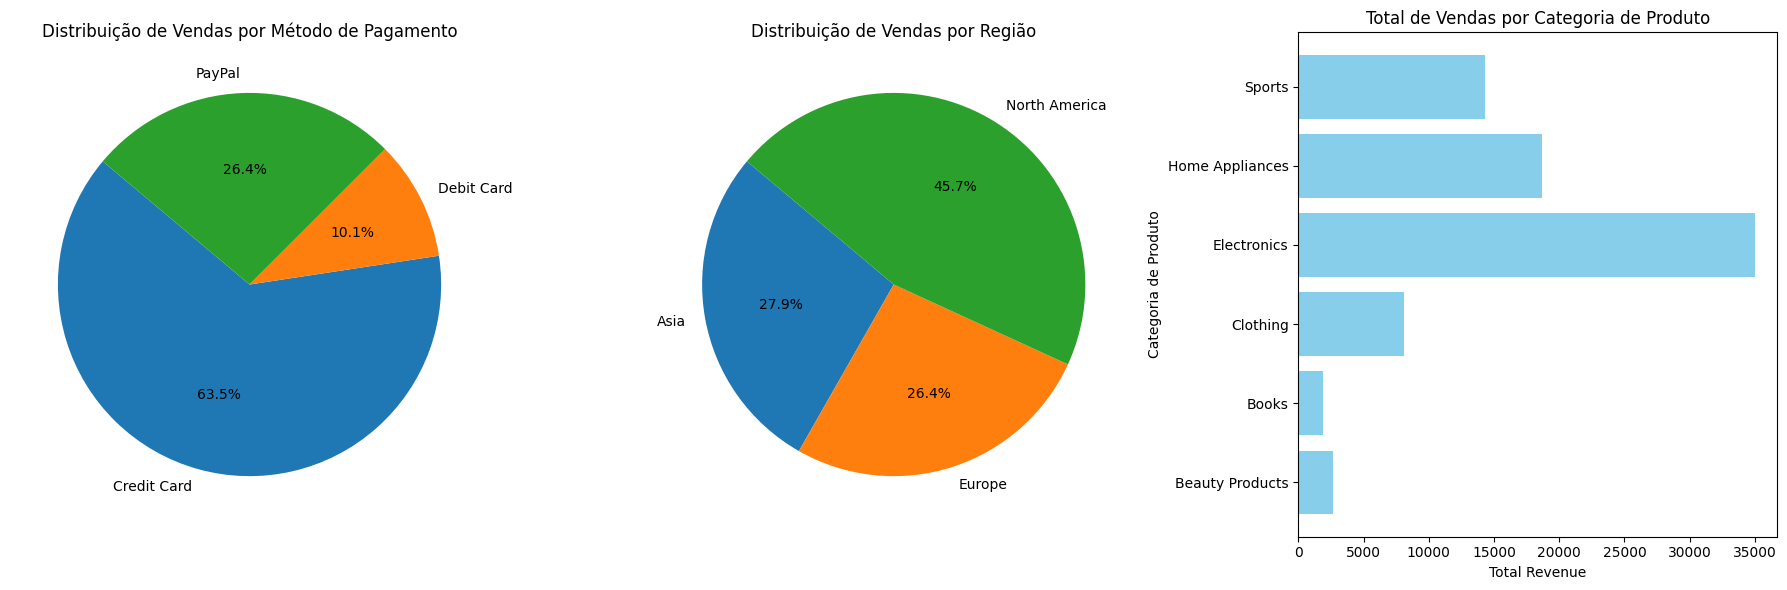

In [50]:
# Somando o valor total por cada grupo
payment_method_sales = df.groupby('Payment Method')['Total Revenda'].sum()
region_sales = df.groupby('Region')['Total Revenda'].sum()
product_category_sales = df.groupby('Product Category')['Total Revenda'].sum()



fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de pizza - Método de Pagamento
ax1.pie(payment_method_sales, labels=payment_method_sales.index, autopct='%1.1f%%', startangle=140)
ax1.set_title('Distribuição de Vendas por Método de Pagamento')
# Gráfico de pizza - Vendas por Região
ax2.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140)
ax2.set_title('Distribuição de Vendas por Região')
# Gráfico de barras - Total de Vendas por Categoria de Produto
ax3.barh(product_category_sales.index, product_category_sales, color='skyblue')
ax3.set_title('Total de Vendas por Categoria de Produto')
ax3.set_xlabel('Total Revenue')
ax3.set_ylabel('Categoria de Produto')


plt.tight_layout()
plt.show()

<Axes: xlabel='Month', ylabel='Total Revenda'>

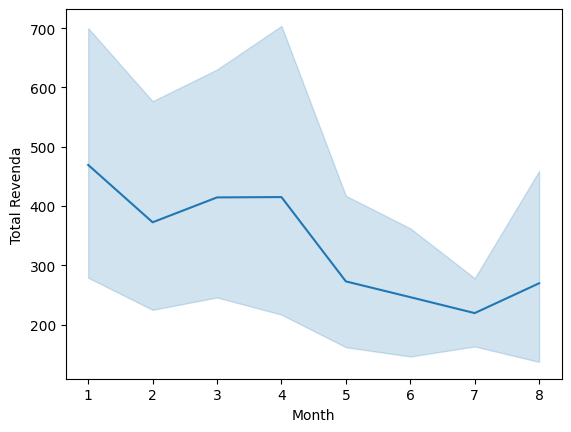

In [44]:
# Grafico de série temporal

sns.lineplot(x='Month', y='Total Revenda', data=df)